In [1]:
import numpy as np
import pandas as pd 
from numpy import log, exp
from itertools import product 
import matplotlib.pyplot as plt 
from scipy.stats import lognorm
from sklearn.metrics import root_mean_squared_error as rmse

Parametros estimados pela CDF:

In [2]:
df_cdf = pd.read_csv('results/preds_CDF.csv')

df_cdf.loc[df_cdf.mu.isna(), ['mu', 'sigma']] = [0.01, 1/2]
df_cdf.head()

,date,lower_95,lower_90,lower_80,lower_50,pred,upper_50,upper_80,upper_90,upper_95,valid_test,state,model_id,mu,sigma
0,2024-10-06,22.422222,40.304679,79.162970,244.274988,853.700012,2982.915845,9196.810733,18041.732884,32366.797486,3,RS,108,6.748348,1.855412
1,2024-10-13,18.743651,34.187301,68.269130,216.515891,779.997873,2809.263104,8900.886361,17748.532118,32294.740637,3,RS,108,6.657830,1.900458
2,2024-10-20,6.581569,12.226861,24.874887,81.165077,301.351891,1118.132411,3638.484729,7371.869282,13600.483733,3,RS,108,5.704178,1.945792
3,2024-10-27,17.097895,32.060474,66.082749,220.934380,843.905436,3222.679992,10763.205908,22149.610067,41420.387215,3,RS,108,6.736465,1.987314
4,2024-11-03,18.724941,35.572182,74.438413,255.270334,1003.039414,3940.407380,13500.169745,28209.239339,53454.977878,3,RS,108,6.909363,2.029238


In [3]:
df_cdf.isnull().sum()

date          0
lower_95      0
lower_90      0
lower_80      0
lower_50      0
pred          0
upper_50      0
upper_80      0
upper_90      0
upper_95      0
valid_test    0
state         0
model_id      0
mu            0
sigma         0
dtype: int64

Parâmetros estimados pela KL:

In [4]:
df_kl = pd.read_csv('results/preds_KL.csv')

#df_kl.loc[df_kl.mu.isna(), ['mu', 'sigma']] = [0.01, 1/2]
df_kl.head()

,date,lower_95,lower_90,lower_80,lower_50,pred,upper_50,upper_80,upper_90,upper_95,valid_test,state,model_id,mu,sigma
0,2024-10-06,22.422222,40.304679,79.162970,244.274988,853.700012,2982.915845,9196.810733,18041.732884,32366.797486,3,RS,108,6.195184,1.748367
1,2024-10-13,18.743651,34.187301,68.269130,216.515891,779.997873,2809.263104,8900.886361,17748.532118,32294.740637,3,RS,108,6.091297,1.790893
2,2024-10-20,6.581569,12.226861,24.874887,81.165077,301.351891,1118.132411,3638.484729,7371.869282,13600.483733,3,RS,108,5.124968,1.834564
3,2024-10-27,17.097895,32.060474,66.082749,220.934380,843.905436,3222.679992,10763.205908,22149.610067,41420.387215,3,RS,108,6.144043,1.872778
4,2024-11-03,18.724941,35.572182,74.438413,255.270334,1003.039414,3940.407380,13500.169745,28209.239339,53454.977878,3,RS,108,6.304380,1.912227


In [5]:
df_kl.columns

Index(['date', 'lower_95', 'lower_90', 'lower_80', 'lower_50', 'pred',
       'upper_50', 'upper_80', 'upper_90', 'upper_95', 'valid_test', 'state',
       'model_id', 'mu', 'sigma'],
      dtype='object')

In [6]:
df_aprox = df_cdf.merge(df_kl, left_on = ['date', 'lower_95', 'lower_90', 'lower_80', 'lower_50', 'pred',
       'upper_50', 'upper_80', 'upper_90', 'upper_95', 'valid_test', 'state',
       'model_id'], right_on =['date', 'lower_95', 'lower_90', 'lower_80', 'lower_50', 'pred',
       'upper_50', 'upper_80', 'upper_90', 'upper_95', 'valid_test', 'state',
       'model_id'],suffixes=('_cdf', '_kl') 
            )

df_aprox.date = pd.to_datetime(df_aprox.date)

df_aprox.head()

,date,lower_95,lower_90,lower_80,lower_50,pred,upper_50,upper_80,upper_90,upper_95,valid_test,state,model_id,mu_cdf,sigma_cdf,mu_kl,sigma_kl
0,2024-10-06,22.422222,40.304679,79.162970,244.274988,853.700012,2982.915845,9196.810733,18041.732884,32366.797486,3,RS,108,6.748348,1.855412,6.195184,1.748367
1,2024-10-13,18.743651,34.187301,68.269130,216.515891,779.997873,2809.263104,8900.886361,17748.532118,32294.740637,3,RS,108,6.657830,1.900458,6.091297,1.790893
2,2024-10-20,6.581569,12.226861,24.874887,81.165077,301.351891,1118.132411,3638.484729,7371.869282,13600.483733,3,RS,108,5.704178,1.945792,5.124968,1.834564
3,2024-10-27,17.097895,32.060474,66.082749,220.934380,843.905436,3222.679992,10763.205908,22149.610067,41420.387215,3,RS,108,6.736465,1.987314,6.144043,1.872778
4,2024-11-03,18.724941,35.572182,74.438413,255.270334,1003.039414,3940.407380,13500.169745,28209.239339,53454.977878,3,RS,108,6.909363,2.029238,6.304380,1.912227


In [7]:
df_aprox.isnull().sum()

date          0
lower_95      0
lower_90      0
lower_80      0
lower_50      0
pred          0
upper_50      0
upper_80      0
upper_90      0
upper_95      0
valid_test    0
state         0
model_id      0
mu_cdf        0
sigma_cdf     0
mu_kl         0
sigma_kl      0
dtype: int64

Mediana e percentil de 95% estimado por cada uma das aproximações: 

In [8]:
for lb in ['cdf', 'kl']: 
    df_aprox[f'med_{lb}'] = lognorm.ppf(0.5, scale=np.exp(df_aprox[f'mu_{lb}'].values), s=df_aprox[f'sigma_{lb}'].values)
    df_aprox[f'upper_95_{lb}'] = lognorm.ppf(0.975, scale=np.exp(df_aprox[f'mu_{lb}'].values), s=df_aprox[f'sigma_{lb}'].values)

df_aprox.head()

,date,lower_95,lower_90,lower_80,lower_50,pred,upper_50,upper_80,upper_90,upper_95,...,state,model_id,mu_cdf,sigma_cdf,mu_kl,sigma_kl,med_cdf,upper_95_cdf,med_kl,upper_95_kl
0,2024-10-06,22.422222,40.304679,79.162970,244.274988,853.700012,2982.915845,9196.810733,18041.732884,32366.797486,...,RS,108,6.748348,1.855412,6.195184,1.748367,852.649066,32366.799648,490.381789,15092.005526
1,2024-10-13,18.743651,34.187301,68.269130,216.515891,779.997873,2809.263104,8900.886361,17748.532118,32294.740637,...,RS,108,6.657830,1.900458,6.091297,1.790893,778.858945,32294.741711,441.994115,14785.207169
2,2024-10-20,6.581569,12.226861,24.874887,81.165077,301.351891,1118.132411,3638.484729,7371.869282,13600.483733,...,RS,108,5.704178,1.945792,5.124968,1.834564,300.118787,13600.484180,168.168752,6128.148016
3,2024-10-27,17.097895,32.060474,66.082749,220.934380,843.905436,3222.679992,10763.205908,22149.610067,41420.387215,...,RS,108,6.736465,1.987314,6.144043,1.872778,842.576791,41420.399460,465.933465,18299.326199
4,2024-11-03,18.724941,35.572182,74.438413,255.270334,1003.039414,3940.407380,13500.169745,28209.239339,53454.977878,...,RS,108,6.909363,2.029238,6.304380,1.912227,1001.608756,53454.984646,546.962269,23208.549166


In [9]:
df_aprox.isnull().sum()

date            0
lower_95        0
lower_90        0
lower_80        0
lower_50        0
pred            0
upper_50        0
upper_80        0
upper_90        0
upper_95        0
valid_test      0
state           0
model_id        0
mu_cdf          0
sigma_cdf       0
mu_kl           0
sigma_kl        0
med_cdf         0
upper_95_cdf    0
med_kl          0
upper_95_kl     0
dtype: int64

In [10]:
df_aprox = df_aprox.loc[df_aprox.state != 'ES']

Erro RMSE entre as medias e percentil superior de 95% estimados por cada uma das aproximações: 

In [11]:
df_erros = pd.DataFrame()

for model, state, val_test in product(df_aprox['model_id'].unique(), df_aprox['state'].unique(), df_aprox['valid_test'].unique()):

    df_model = df_aprox.loc[(df_aprox.model_id == model) & (df_aprox.state == state) & (df_aprox.valid_test == val_test)]

    df_erros = pd.concat([df_erros,
                         pd.DataFrame([[state, model, val_test, 
                                        rmse(df_model.pred, df_model.med_cdf), 
                                        rmse(df_model.upper_95, df_model.upper_95_cdf),
                                        rmse(df_model.pred, df_model.med_kl), 
                                        rmse(df_model.upper_95, df_model.upper_95_kl)]],
                                     columns = ['state', 'model_id', 'validation_test', 'rmse_pred_cdf', 'rmse_upper_cdf',
                                                'rmse_pred_kl', 'rmse_upper_kl'])],
                        ignore_index = True)

df_erros.head()

,state,model_id,validation_test,rmse_pred_cdf,rmse_upper_cdf,rmse_pred_kl,rmse_upper_kl
0,RS,108,3,9.163520,1.134966,22077.740463,6.451974e+06
1,RS,108,2,10.931199,0.236537,4247.885719,1.495112e+06
2,RS,108,1,17.635729,0.099418,2145.906696,7.118213e+05
3,RN,108,3,0.194132,0.000156,67.324096,6.573053e+02
4,RN,108,2,2.447819,0.000203,21.049625,1.888597e+03


Summary comparing the methodologys: 

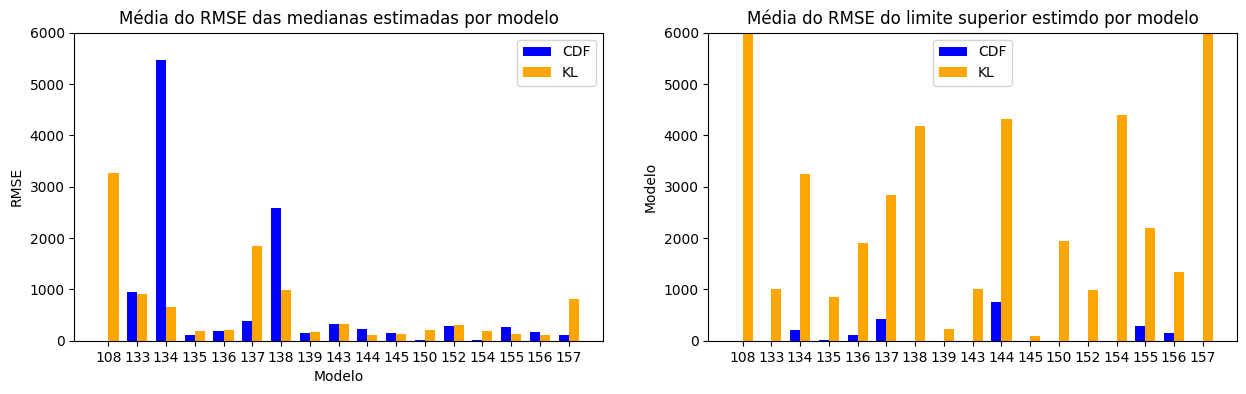

In [12]:
_, ax = plt.subplots(1, 2, figsize=(15, 4))

# Group data
pred_cdf = df_erros.groupby('model_id')[['rmse_pred_cdf']].mean()
upper_cdf = df_erros.groupby('model_id')[['rmse_upper_cdf']].mean()

pred_kl = df_erros.groupby('model_id')[['rmse_pred_kl']].mean()
upper_kl = df_erros.groupby('model_id')[['rmse_upper_kl']].mean()

x = np.arange(len(pred_cdf))  # positions for bars
width = 0.35  # width of the bars

# First subplot: side-by-side bars
ax[0].bar(x - width/2, pred_cdf.rmse_pred_cdf.values, width, label='CDF', color='blue')
ax[0].bar(x + width/2, pred_kl.rmse_pred_kl.values, width, label='KL', color='orange')
ax[0].set_xticks(x)
ax[0].set_xticklabels(pred_cdf.index.astype(str))
ax[0].legend()

ax[0].set_title('Média do RMSE das medianas estimadas por modelo')
ax[1].set_title('Média do RMSE do limite superior estimdo por modelo')
ax[0].set_ylabel('RMSE')
ax[0].set_xlabel('Modelo') 
ax[1].set_ylabel('Modelo') 

# Second subplot: side-by-side bars
ax[1].bar(x - width/2, upper_cdf.rmse_upper_cdf.values, width, label='CDF', color='blue')
ax[1].bar(x + width/2, upper_kl.rmse_upper_kl.values, width, label='KL', color='orange')
ax[1].set_xticks(x)
ax[1].set_xticklabels(upper_cdf.index.astype(str))
ax[1].legend()
ax[0].set_ylim([0, 6000])
ax[1].set_ylim([0, 6000])
plt.show()

Modelos em que o erro da mediana do CDF é maior que o do KL: 

* 133, 134, 138, 144, 152, 155, 156

Porém, para todos eles erro no intervalo superior é menor. 

Visualização de algum modelo em detalhe: 

In [13]:
df_erros.loc[df_erros.rmse_pred_cdf == df_erros.rmse_pred_cdf.max()]

,state,model_id,validation_test,rmse_pred_cdf,rmse_upper_cdf,rmse_pred_kl,rmse_upper_kl
216,SP,134,3,161542.04715,0.125271,1412.503397,977.506112


In [30]:
model = df_erros.loc[df_erros.rmse_pred_cdf == df_erros.rmse_pred_cdf.max()].model_id.values[0]
state =  df_erros.loc[df_erros.rmse_pred_cdf == df_erros.rmse_pred_cdf.max()].state.values[0]
val_test = df_erros.loc[df_erros.rmse_pred_cdf == df_erros.rmse_pred_cdf.max()].validation_test.values[0]
#model = df_erros.loc[df_erros.rmse_pred_cdf == df_erros.loc[df_erros.model_id ==155].rmse_pred_cdf.max()].model_id.values[0]
#state =  df_erros.loc[df_erros.rmse_pred_cdf == df_erros.loc[df_erros.model_id ==155].rmse_pred_cdf.max()].state.values[0]
#val_test = df_erros.loc[df_erros.rmse_pred_cdf == df_erros.loc[df_erros.model_id ==155].rmse_pred_cdf.max()].validation_test.values[0]

df_problem = df_aprox.loc[(df_aprox.model_id == model) & (df_aprox.state == state) & (df_aprox.valid_test == val_test)]
df_problem.head()

,date,lower_95,lower_90,lower_80,lower_50,pred,upper_50,upper_80,upper_90,upper_95,...,state,model_id,mu_cdf,sigma_cdf,mu_kl,sigma_kl,med_cdf,upper_95_cdf,med_kl,upper_95_kl
8892,2024-10-06,41165.544660,41837.478122,42075.490001,42785.933736,43244.640229,43466.160210,43485.341792,43494.661132,43509.689147,...,SP,134,7.349123,1.699835,10.662819,0.012678,1554.831950,43509.689531,42736.942918,43812.224480
8893,2024-10-13,85947.148227,88018.175527,88541.553631,90629.774522,91961.036714,92593.382169,92643.215867,92667.223101,92703.338776,...,SP,134,8.225782,1.638488,11.413050,0.017138,3736.041715,92703.388988,90495.052238,93586.349305
8894,2024-10-20,100371.381073,102785.425288,103388.844770,105837.243393,107381.750730,108119.142931,108176.427700,108204.367344,108244.990372,...,SP,134,8.339695,1.659448,11.568127,0.017096,4186.810661,108245.082380,105675.362538,109276.174789
8895,2024-10-27,115466.972490,118207.356635,118891.386793,121665.987150,123422.944042,124260.178020,124324.525420,124355.866354,124400.570993,...,SP,134,8.535650,1.630445,11.707548,0.016879,5093.141731,124400.686555,121485.279075,125571.439479
8896,2024-11-03,122394.930600,125264.614776,125986.759257,128886.383292,130721.736256,131598.457323,131665.465738,131697.947595,131744.177056,...,SP,134,8.581639,1.636243,11.765216,0.016663,5332.840435,131744.183151,128696.936352,132969.391548


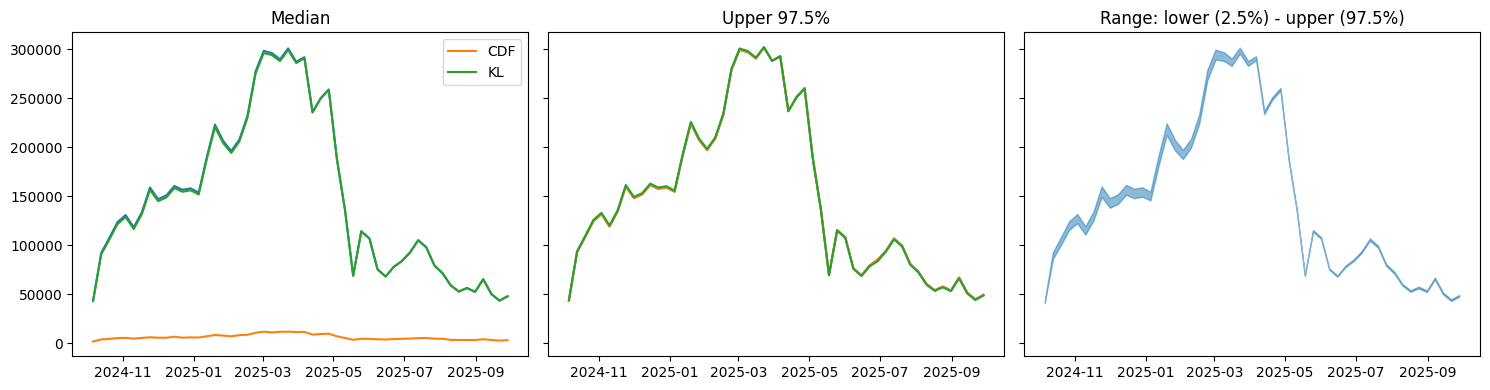

In [31]:
_, ax = plt.subplots(1,3, figsize = (15, 4), sharey = True)

ax[0].plot(df_problem.date, df_problem.pred)

ax[0].plot(df_problem.date, df_problem.med_cdf, label = 'CDF')

ax[0].plot(df_problem.date, df_problem.med_kl, label = 'KL')

ax[0].set_title('Median')

ax[0].legend()

ax[1].plot(df_problem.date, df_problem.upper_95 )

ax[1].plot(df_problem.date, df_problem.upper_95_cdf, label = 'CDF')

ax[1].plot(df_problem.date, df_problem.upper_95_kl, label = 'KL')

ax[1].set_title('Upper 97.5%')

ax[2].fill_between(df_problem.date, df_problem.lower_95, df_problem.upper_95, color = 'tab:blue', alpha = 0.5)

ax[2].set_title('Range: lower (2.5%) - upper (97.5%)')

plt.tight_layout()
plt.show()